# Оценка результатов А/В теста по внедрению новой рекомендательной системы

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Предобработка" data-toc-modified-id="Предобработка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Предобработка</a></span><ul class="toc-item"><li><span><a href="#Изучение-датасетов" data-toc-modified-id="Изучение-датасетов-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение датасетов</a></span></li><li><span><a href="#Проверка-данных-на-соответствие-ТЗ" data-toc-modified-id="Проверка-данных-на-соответствие-ТЗ-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка данных на соответствие ТЗ</a></span><ul class="toc-item"><li><span><a href="#Даты" data-toc-modified-id="Даты-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Даты</a></span></li><li><span><a href="#Аудитория" data-toc-modified-id="Аудитория-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Аудитория</a></span></li><li><span><a href="#Пересечения-по-тестам" data-toc-modified-id="Пересечения-по-тестам-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Пересечения по тестам</a></span></li><li><span><a href="#Действия-пользователей-и-лайфтайм" data-toc-modified-id="Действия-пользователей-и-лайфтайм-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Действия пользователей и лайфтайм</a></span></li><li><span><a href="#Частота-совершения-событий-по-дням" data-toc-modified-id="Частота-совершения-событий-по-дням-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Частота совершения событий по дням</a></span></li><li><span><a href="#Пересечения-с-маркетинговыми-мероприятими" data-toc-modified-id="Пересечения-с-маркетинговыми-мероприятими-1.2.6"><span class="toc-item-num">1.2.6&nbsp;&nbsp;</span>Пересечения с маркетинговыми мероприятими</a></span></li></ul></li></ul></li><li><span><a href="#Исследовательский-анализ-данных:" data-toc-modified-id="Исследовательский-анализ-данных:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных:</a></span><ul class="toc-item"><li><span><a href="#Рапсределение-количества-событий" data-toc-modified-id="Рапсределение-количества-событий-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Рапсределение количества событий</a></span></li><li><span><a href="#Воронка-и-конверсия" data-toc-modified-id="Воронка-и-конверсия-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Воронка и конверсия</a></span></li><li><span><a href="#Особенности" data-toc-modified-id="Особенности-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Особенности</a></span></li></ul></li><li><span><a href="#Оцените-результаты-A/B-тестирования" data-toc-modified-id="Оцените-результаты-A/B-тестирования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Оцените результаты A/B-тестирования</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

**Цель:** принять решение о внедрении/отказа от улучшенной системы рекомендаций на основе проведенного А/B теста, в случае если тестирование проведено корректно.

**Задача:** провести оценку A/B-теста с точки зрения соответствия техническому заданию (требования приведены ниже) и корректности проведения самого теста. Проанализировать полученные по итогам теста результаты. 

Для выполнения задачи используется ряд датасетов: профили пользователей, действия пользователей, участники тестов с распределением по группам, а также перечень првоеденных маркетинговых событий.

Корректность проведения теста оценивается по следующим параметрам:
- отсутствие/наличие пересечений с конкурирующим тестом;
- отсутствие/наличие пользователей, участвующих в обеих группах теста одновременно;
- отсутствие/наличие влияние сезонных изменений поведения покупателя и маркетинговых мероприятий;
- соответствие требованиям ТЗ;
- равномерность распределения пользователей по тестовым группам.

# Техническое задание

- Название теста: `recommender_system_test`;
- группы: А — контрольная, B — новая платёжная воронка;
- дата запуска: 2020-12-07;
- дата остановки набора новых пользователей: 2020-12-21;
- дата остановки: 2021-01-04;
- аудитория: в тест должно быть отобрано 15% новых пользователей из региона EU;
- назначение теста: тестирование изменений, связанных с внедрением улучшенной рекомендательной системы;
- ожидаемое количество участников теста: 6000.
- ожидаемый эффект: за 14 дней с момента регистрации пользователи покажут улучшение каждой метрики не менее, чем на 10%:
    - конверсии в просмотр карточек товаров — событие `product_page`,
    - просмотры корзины — `product_cart`,
    - покупки — `purchase`.

## Предобработка

### Изучение датасетов

In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
participants = pd.read_csv('/datasets/final_ab_participants.csv')
marketing_events = pd.read_csv('/datasets/ab_project_marketing_events.csv')
new_users = pd.read_csv('/datasets/final_ab_new_users.csv')
events = pd.read_csv('/datasets/final_ab_events.csv')

In [3]:
display(participants.head())
display(participants.info())
participants.describe().T

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB


None

,count,unique,top,freq
user_id,18268,16666,0FDFDA0B2DEC2D91,2
group,18268,2,A,9655
ab_test,18268,2,interface_eu_test,11567


In [4]:
participants.duplicated().sum()

0

Пропусков и дубликатов нет, менять формат данных/названия в столбцах не нужно.

In [5]:
display(marketing_events.head())
display(marketing_events.info())
marketing_events.describe().T

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


None

,count,unique,top,freq
name,14,14,Christmas&New Year Promo,1
regions,14,6,APAC,4
start_dt,14,14,2020-12-25,1
finish_dt,14,14,2021-01-03,1


In [6]:
marketing_events.duplicated().sum()

0

Пропусков и дубликатов не обнаружено. Нужно привести формат данных в столбцах с датой к корректному.

In [7]:
marketing_events['start_dt'] = pd.to_datetime(marketing_events['start_dt'], format='%Y-%m-%d')
marketing_events['finish_dt'] = pd.to_datetime(marketing_events['finish_dt'], format='%Y-%m-%d')

In [8]:
display(new_users.head())
display(new_users.info())
new_users.describe().T

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


None

,count,unique,top,freq
user_id,61733,61733,D72A72121175D8BE,1
first_date,61733,17,2020-12-21,6290
region,61733,4,EU,46270
device,61733,4,Android,27520


In [9]:
new_users.duplicated().sum()

0

In [10]:
new_users['user_id'].duplicated().sum()

0

Пропусков и дубликатов не обнаружено. Нужно привести формат данных в столбце с датой к корректному.

In [11]:
new_users['first_date'] = pd.to_datetime(new_users['first_date'], format='%Y-%m-%d')

In [12]:
display(events.head())
display(events.info())
events.describe().T

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


None

,count,mean,std,min,25%,50%,75%,max
details,62740.0,23.877631,72.180465,4.99,4.99,4.99,9.99,499.99


In [13]:
events.duplicated().sum()

0

Дубликаты отстутствуют. В столбце details есть большая доля пропусков. Нужно их изучить, но для начала приведем данные в столбце с датой к нужному формату.

In [14]:
events['event_dt'] = pd.to_datetime(events['event_dt'], format='%Y-%m-%d %H:%M:%S')

Посмотрим какие события встречаются в датасете.

In [15]:
events['event_name'].unique()

array(['purchase', 'product_cart', 'product_page', 'login'], dtype=object)

Посмотрим какие события встречаются в строках с пропусками в details.

In [16]:
events[events['details'].isna()]['event_name'].unique()

array(['product_cart', 'product_page', 'login'], dtype=object)

В строках с пропусками в details встречаются все события, кроме `purchase`, значит в столбце details указана сумма покупки. При других событиях (логин, просмотр карточки товара и просмотр корзины) пользователь не совершает покупку, а значит ничего не тратит. Получается, что пропуски в этом столбце не ошибка. Можно просто оставить как есть. 

### Проверка данных на соответствие ТЗ

#### Даты
Согласно ТЗ:
- даты проведения теста: с 2020-12-07 по 2021-01-04;
- дата остановки набора новых пользователей: 2020-12-21.

In [17]:
print('Период регистрации новых пользователей: с', new_users['first_date'].min(), 'по', new_users['first_date'].max())
print('Пользователи совершали события в период с', events['event_dt'].min(), 'по', events['event_dt'].max())

Период регистрации новых пользователей: с 2020-12-07 00:00:00 по 2020-12-23 00:00:00
Пользователи совершали события в период с 2020-12-07 00:00:33 по 2020-12-30 23:36:33


В полученных для анализа датасетах присутствуют пользователи, зарегистрировавшиеся после даты остановки набора новых пользователей - учитывать их в анализе А/Б теста нельзя, удалим их из датасета.

Период совершения различных события пользователями укладывается в даты проведения теста, однако последние действия были совершены 30 декабря, в то время как дата окончания теста - 4 января. Это могло исказить результаты теста. Кроме того, согласно ТЗ необходимо учитывать только те события, которые были совершены пользователем в течении 14 дней с момента регистрации - это будет необходимо учесть при дальнейшем анализе.

In [18]:
len(new_users)

61733

In [19]:
new_users = new_users.query('first_date <="2020-12-21"')

In [20]:
len(new_users)

56470

#### Аудитория

In [21]:
participants.groupby(['ab_test', 'group']).agg({'user_id': 'count'})

user_id
ab_test                 group         
interface_eu_test       A         5831
                        B         5736
recommender_system_test A         3824
                        B         2877

Выделим в отдельный датасет пользователей, принявших участие в исследуемом тесте (recommender_system_test) и укажем для каждого из них регион на основе данных из датасета new_users.

In [22]:
recom_test = participants.query('ab_test == "recommender_system_test"')

Согласно ТЗ ожидаемое количество участников теста составляет 6000. Проверим это.

In [23]:
print('Всего уникальных пользователей, принявших участие в рассматриваемом тесте:', recom_test['user_id'].nunique())

Всего уникальных пользователей, принявших участие в рассматриваемом тесте: 6701


Дополним данные о пользователях информацией о регионе и девайсе.

In [24]:
recom_test = recom_test.merge(new_users, on='user_id', how='inner')

Проверим, что не потеряли пользователей при объединении. Далее посмотрим из какиз регионов участники теста (по ТЗ должны быть только из Европы) и проверим на соответствие ТЗ долю участников из Европы.

In [25]:
len(recom_test)

6701

In [26]:
recom_test['region'].unique()

array(['EU', 'N.America', 'CIS', 'APAC'], dtype=object)

In [27]:
recom_test = recom_test.query('region == "EU"')

In [28]:
print('Количество участников теста (только из Европы) = ', recom_test['user_id'].nunique())

Количество участников теста (только из Европы) =  6351


In [29]:
print('Доля новых зарегистрировавшихся пользователей из Европы, принявших участие в нашем А/Б тесте =',
      round(100*len(recom_test)/len(new_users.query('region == "EU"')), 2),
      '%')

Доля новых зарегистрировавшихся пользователей из Европы, принявших участие в нашем А/Б тесте = 15.0 %


#### Пересечения по тестам
Проверим пересечение участников по тестам и группам.

In [30]:
print('Количество пользователей, ставших участниками сразу двух А/Б тестов =', 
      len(participants.groupby('user_id').agg({'ab_test': 'nunique'}).query('ab_test > 1'))
     )

Количество пользователей, ставших участниками сразу двух А/Б тестов = 1602


In [31]:
print('Доля пользователей из другого теста, попавшего в участники рассматриваемого теста = ', round(
    100*len(participants.groupby('user_id').agg({'ab_test': 'nunique'}).query('ab_test > 1'))/recom_test['user_id'].nunique(),
    1), '%')

Доля пользователей из другого теста, попавшего в участники рассматриваемого теста =  25.2 %


Почти четверть участников нашего теста параллельно приняла участие и в конкурирующем тесте, что могло исказить результаты. Однако это слишком большое количество пользователей, если их просто не учитывать, то мошность теста будет уменьшена (вырастет вероятность ошибки второго рода). Чтобы избежать возможности ошибки в результатах удалять этих пользователей не будем.

Посмотрим как пользователи из конкурирующего теста распределились между группами анализируемого теста. Для этого выделим id участников группы А и группы Б конкурирующего теста в отдельные датасеты.

In [32]:
interface_A = participants.query('ab_test == "interface_eu_test" and group == "A"')['user_id']
interface_B = participants.query('ab_test == "interface_eu_test" and group == "B"')['user_id']

In [33]:
print('Распределение участников группы А конкурирующего теста по группам нашего теста:')
recom_test[recom_test['user_id'].isin(interface_A)].groupby('group').agg(users=('user_id', 'count'))

Распределение участников группы А конкурирующего теста по группам нашего теста:


,users
group,
A,482
B,337


Группа А - это контрольная группа, т.е. пользователи группы А конкурирующего теста пользовались базовой версией приложения (без каких-либо изменений), поэтому они не искажают результаты нашего теста и могут считаться полноценными его участниками.

In [34]:
print('Распределение участников группы Б конкурирующего теста по группам нашего теста:')
recom_test[recom_test['user_id'].isin(interface_B)].groupby('group').agg(users=('user_id', 'count'))

Распределение участников группы Б конкурирующего теста по группам нашего теста:


,users
group,
A,439
B,344


Участники группы Б конкурирующего теста взаимодействовали с измененной версией приложения, т.е. на их поведение оказывал влияние конкурирующий тест, что в свою очередь искажает результаты рассматриваемого теста. Однако, просто удалив их нашего теста, мы потеряем почти 800 пользователей, что снизит мощность нашего теста и увеличит вероятность возникновения ошибок. Поэтому можно предположить, что если участники группы Б другого теста распределились равномерно между группами нашего теста, то их влияние на поведение групп в целом тоже было равномерным. 

Проверим это через проверку гипотезу о равенстве долей. Для этого сформируем два набора: кол-во участников из группы Б в группах нашего теста и кол-во всех участников в каждой из групп нашего теста.

- H0: Доли участников группы Б другого теста в группах нашего теста НЕ имеют статистически значимой разницы (т.е. участники распределены равномерно)
- H1: Доли имеют статистически значимые различий

In [35]:
#участники из группы Б другого теста с разделением по группам нашего теста
success = np.array(
    recom_test[recom_test['user_id'].isin(interface_B)]
    .groupby('group')
    .agg(users=('user_id', 'count'))
    ['users'])
nobs = np.array(recom_test.groupby('group').agg(users=('user_id', 'count'))['users']) #всего юзеров по группам нашего теста

In [36]:
alpha = .05
z_stat, p_value = proportions_ztest(success, nobs)
print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

p-значение:  0.4861791801372526
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Участники группы Б второго теста распределились в наших группах равномерно, т.е. их влияние на каждую из наших групп одинаково, поэтому не будем удалять их из анализа ради сохранение мощности теста, но помним про их влияние.

Также проверим, нет ли пересечений между группами нашего теста.

In [37]:
print('Количество пользователей рассматриваемого теста, ошибочно попавших в обе группы =',
      len(recom_test.groupby('user_id').agg({'group' : 'nunique'}).query('group > 1'))
     )

Количество пользователей рассматриваемого теста, ошибочно попавших в обе группы = 0


#### Действия пользователей и лайфтайм
Теперь добавим к участникам нашего теста информацию о совершенных ими действиях.

In [38]:
recom_test = recom_test.merge(events, on='user_id', how='left')

In [39]:
recom_test.head()

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,details
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,purchase,99.99
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25 00:04:56,purchase,4.99
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:29,product_cart,NaN
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25 00:04:57,product_cart,NaN
4,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,product_page,NaN


Проверим не потеряли ли мы участников нашего теста.

In [40]:
recom_test['user_id'].nunique()

6351

Все на месте.

In [41]:
recom_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26290 entries, 0 to 26289
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     26290 non-null  object        
 1   group       26290 non-null  object        
 2   ab_test     26290 non-null  object        
 3   first_date  26290 non-null  datetime64[ns]
 4   region      26290 non-null  object        
 5   device      26290 non-null  object        
 6   event_dt    23420 non-null  datetime64[ns]
 7   event_name  23420 non-null  object        
 8   details     3196 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 2.0+ MB


В добавленных столбцах с информацией о совершенных действиях появились пропуски - это значит, что некоторые пользователи после регистрации не совершили никаких других действий. 

Т.к. в тесте оценивают изменение конверсии в просмотр карточек товаров, просмотры корзины и покупки, то пользователей, которые кроме регистрации ничего не совершали можно удалить.

In [42]:
recom_test.groupby('group').agg({'user_id': 'nunique'})

,user_id
group,
A,3634
B,2717


In [43]:
print('Количество неактивных пользователей, попавших в участники теста = ', 
      recom_test[recom_test['event_dt'].isna()]['user_id'].nunique())
print('Доля неактивных пользователей от всех участников теста = ',
           round(
               100*recom_test[recom_test['event_dt'].isna()]['user_id'].nunique()/recom_test['user_id'].nunique(), 2),
     '%')

Количество неактивных пользователей, попавших в участники теста =  2870
Доля неактивных пользователей от всех участников теста =  45.19 %


In [44]:
print('Количество неактивных пользователей по группам:',
recom_test[recom_test['event_dt'].isna()].groupby('group')['user_id'].nunique())

Количество неактивных пользователей по группам: group
A    1030
B    1840
Name: user_id, dtype: int64


In [45]:
lost = np.array(recom_test[recom_test['event_dt'].isna()].groupby('group')['user_id'].nunique())
total = np.array(recom_test.groupby('group')['user_id'].nunique())
print('Доля неактивных пользователей в группе А = ', round(100*lost[0]/total[0],1), '%')
print('Доля неактивных пользователей в группе Б = ', round(100*lost[1]/total[1],1), '%')

Доля неактивных пользователей в группе А =  28.3 %
Доля неактивных пользователей в группе Б =  67.7 %


Неактивные пользователи составляют почти половину от всех участников теста - по ним нельзя рассчитать изменение конверсии интересующих нас метрик, т.к. они не совершали никаких действий кроме регистрации. Таким образом количество участников тесте не соответствует ожидаемому по ТЗ (6000). Отметим этот факт как недостаток проведенного теста.

In [46]:
recom_test = recom_test.dropna(subset=['event_dt']) #удаляем неактивных пользователей

Добавим колонку с количеством дней после регистрации до совершения каждого из событий

In [47]:
recom_test['period'] = recom_test['event_dt'] - recom_test['first_date']

In [48]:
recom_test.head()

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,details,period
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,purchase,99.99,0 days 14:43:27
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25 00:04:56,purchase,4.99,18 days 00:04:56
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:29,product_cart,NaN,0 days 14:43:29
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25 00:04:57,product_cart,NaN,18 days 00:04:57
4,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,product_page,NaN,0 days 14:43:27


In [49]:
display(recom_test['period'].min())
recom_test['period'].max()

Timedelta('0 days 00:00:04')

Timedelta('23 days 12:42:57')

Согласно ТЗ ожидаемый эффект от нововведений должен быть получен за 14 дней с момента регистрации пользователя, таким образом нас интересуют только те события, которые пользователи совершили в первые 2 недели после регистрации. Более поздние события можно удалять.

In [50]:
recom_test = recom_test[recom_test['period'] <= "14 days"]

In [51]:
display(recom_test['period'].min())
recom_test['period'].max()

Timedelta('0 days 00:00:04')

Timedelta('13 days 23:52:52')

In [52]:
recom_test['user_id'].nunique()

3481

Посмотрим как распределены пользователи по тестовым группам после удаления неактивных пользователей и событий, совершенных позже 14 дней после регистрации.

In [53]:
recom_test.groupby('group').agg({'user_id': 'nunique'})

,user_id
group,
A,2604
B,877


Участники теста по группам распределены неравномерно:

In [54]:
print('В группе А в', 
      round(recom_test.query('group == "A"')['user_id'].nunique()/recom_test.query('group == "B"')['user_id'].nunique(), 1)
      ,'раз больше участников, чем в группе В')

В группе А в 3.0 раз больше участников, чем в группе В


Группы необязательно должны быть равными по размеру, для корректного проведения теста группы просто должны быть достаточно большими. Равный размер групп дает оптимальную длительность теста.

#### Частота совершения событий по дням
Изучим на какой день после регистрации пользователи чаще всего совершают какие-либо действия.

In [55]:
recom_test['period'] = recom_test['period'].dt.days #округлим период до дней

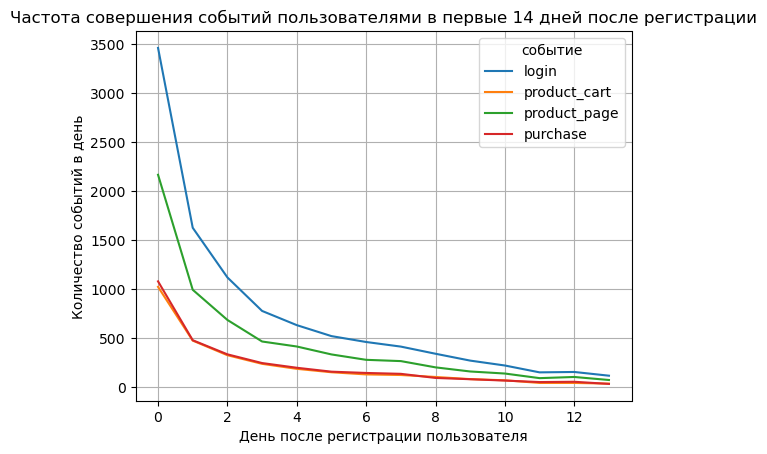

In [56]:
recom_test.pivot_table(index='period', columns='event_name', 
                       values='user_id', aggfunc='count').plot(grid=True)
plt.title('Частота совершения событий пользователями в первые 14 дней после регистрации')
plt.xlabel('День после регистрации пользователя')
plt.ylabel('Количество событий в день')
plt.legend(title=('событие'));

Для каждого из событий наиболее количество совершенных действий приходится на первые сутки после регистрации. Далее количество событий постепенно уменьшается. Самым частым действием является login, на втором месте просмотр страницы товара и далее с практически одинаковой частотой идут просмотр корзины и покупка. То, что количество просмотров корзины примерно одинаково с количеством покупок может означать, что покупку можно совершить минуя этап просмотра корзины (в первый день количество покупок даже немного превосходит количество просмотров корзины.

#### Пересечения с маркетинговыми мероприятими
Проверим проводились ли одновременно с тестом какие-либо маркетинговые мероприятия (с учетом региона).

In [57]:
marketing_events.head()

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


In [58]:
test_start = dt.date(2020, 12, 7) #дата запуска теста
test_finish = dt.date(2021, 1, 4) #дата окончания теста

Отберем события, которые пересекаются с периодом проведения теста.

In [59]:
marketing_events.query('start_dt <= @test_finish and finish_dt >= @test_start')

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
10,CIS New Year Gift Lottery,CIS,2020-12-30,2021-01-07


В даты проведения теста было запущено два маркетинговых мероприятия. Т.к. участники нашего теста из Европы, то влияние на них могло оказать только то мероприятие, которое проходило в Европе. Такое мероприятие всего одно - это `Christmas&New Year Promo`. При этом влияние маркетингового мероприятия будет одинаково для участников обеих тестовых групп. Однако если влияние было слишком сильным, то это может исказить результаты теста, поэтому посмотрим как распределена частота совершения действий пользователями по дням.

In [60]:
recom_test['event_date'] = recom_test['event_dt'].dt.date

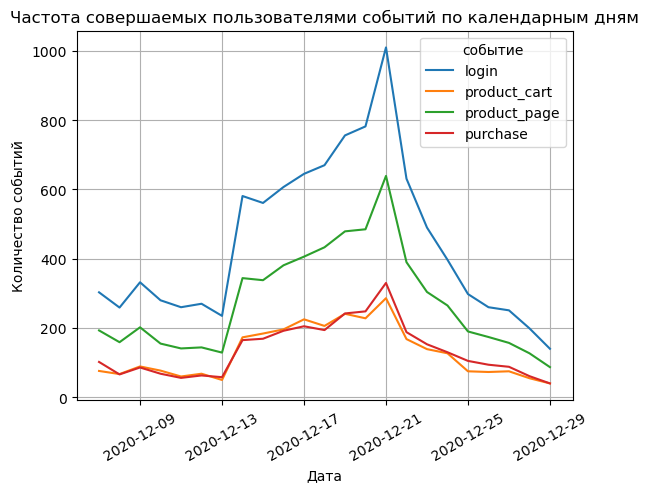

In [61]:
recom_test.pivot_table(index='event_date', columns='event_name', 
                       values='user_id', aggfunc='count').plot(grid=True)
plt.title('Частота совершаемых пользователями событий по календарным дням')
plt.xlabel('Дата')
plt.xticks(rotation=30)
plt.ylabel('Количество событий')
plt.legend(title='событие');

14 и 21 декабря наблюдается скачок по всем типам событий, но маркетинговые акции начинаются позже. Значит маркетинговая акция не оказала значительного влияния на проведение теста.

Помимо маркетинговых мероприятий на проведение теста и результаты могли повлиять сезонные событий. В нашем случае тест проводится перед НГ, когда все готовятся к празднику, покупают подарки и характерный набор продуктов, т.е. поведение покупателей обеих тестовых групп искажено, что также в целом негативно влияет на сам тест.

## Исследовательский анализ данных:

### Рапсределение количества событий
Для начала посмотрим распределение количества регистраций участников каждой тестовой группы по дням.

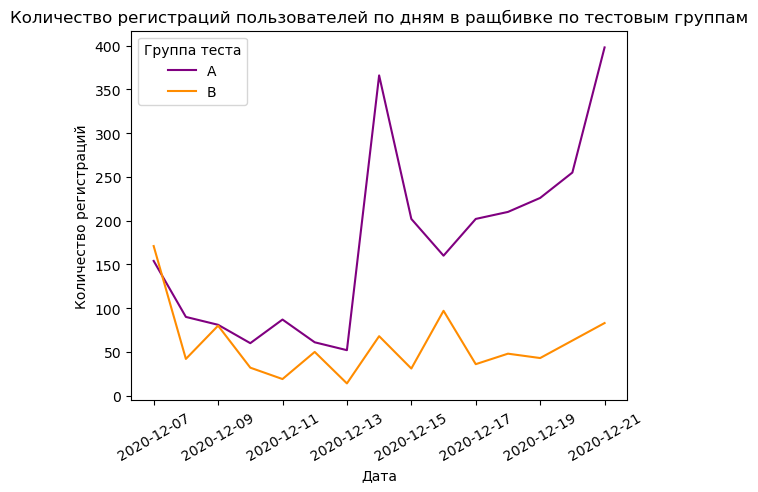

In [62]:
sns.lineplot(data=recom_test.groupby(['group', 'first_date'], as_index=False).agg({'user_id': 'nunique'}),
            x='first_date', y='user_id', hue='group', palette=['purple', 'darkorange'])
plt.title('Количество регистраций пользователей по дням в ращбивке по тестовым группам')
plt.legend(title='Группа теста')
plt.ylabel('Количество регистраций')
plt.xlabel('Дата')
plt.xticks(rotation=30);

В первую неделю количество регистраций для каждой группы примерно одного порядка, однако 14 декабря наблюдается резкий скачок регистраций участников в контрольную группу А (хотя в эти даты нет маркетинговых мероприятий, которые могли бы исказить приток пользователей). От ~50 регистраций в день число новых пользователей резко вырочло до почти 400 регистраций в день, после чего снова упало до 170. Для группы В таких резких изменений не наблюдается. В предпоследний день набора участников в тестовые группы количество регистраций для обеих групп снова начинало расти, для группы А опять более резко, чем для группы В.

Теперь изучим как менялось число событий по дням для каждой из групп.

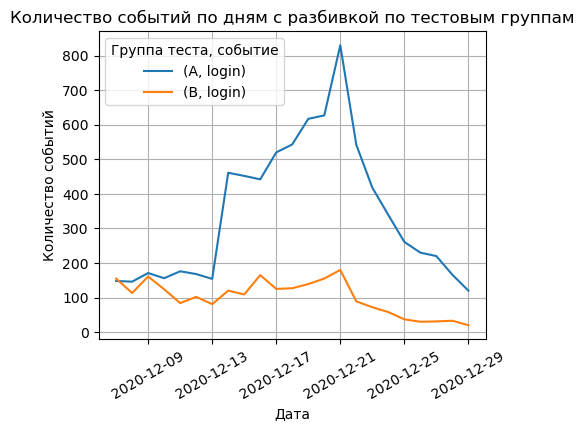

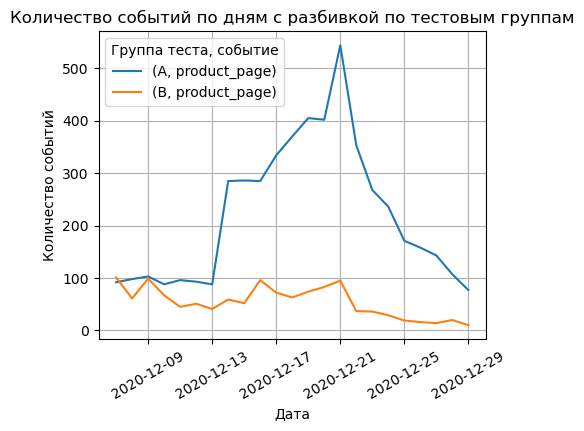

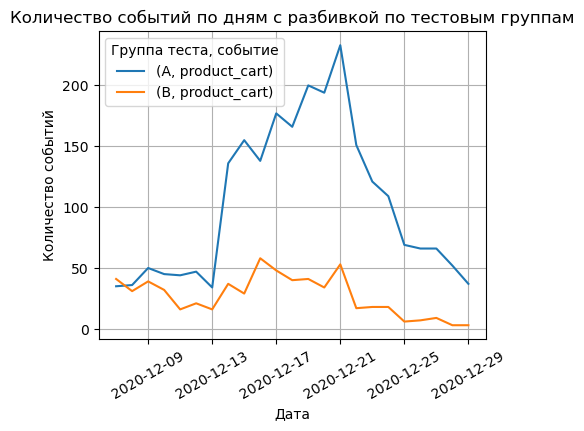

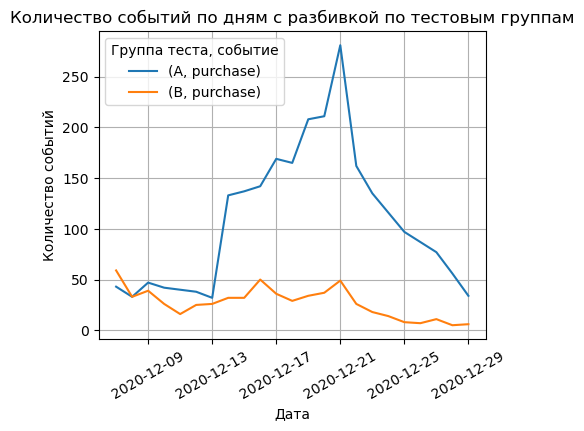

In [63]:
for event in ['login', 'product_page', 'product_cart', 'purchase']:                       #задаю списком в нужном порядке
    recom_test.query('event_name == @event').pivot_table(index='event_date', columns=['group', 'event_name'], 
                       values='user_id', aggfunc='count').plot(figsize=(5,4))
    plt.title('Количество событий по дням с разбивкой по тестовым группам')
    plt.xlabel('Дата')
    plt.xticks(rotation=30)
    plt.ylabel('Количество событий')
    plt.legend(title='Группа теста, событие')
    plt.grid();

14 и 21 декабря наблюдаются резкие скачки количества событий для группы А - очевидно это можно связать с большим количеством новых зарегистрировавшихся пользователей в эти дни. Т.к. такого большого притока участников в группу B не было ни в один из дней, то и количество событий (каждого типа) для группы В стабильно меньше, чем для группы А. И больше всего действий пользователей совершает именно в день регистрации. Количество событий по группе В превышает количество событий по группе А только в первый день, что опять же связано с количество регистраций.

В последние пару дней несмотря на то, что количество регистраций в обеих группах росло, количество событий каждого типа уменьшается - это говорит о том, что в эти дни пришли менее качественные пользователи, которые не были активными.

Т.к. группы несбалансированны, то сравнивать их по абсолютным значениям не совсем корректно, поэтому также посмотрим сколько в среднем различных событий совершали участники каждой из групп.

In [64]:
event_per_user = recom_test.groupby(['group', 'event_name']).agg(total=('user_id', 'count'),
                                               unique=('user_id', 'nunique'))
event_per_user['mean'] = round(event_per_user['total']/event_per_user['unique'], 1)

In [65]:
print('Среднее количество событий на пользователя по группам')
event_per_user

Среднее количество событий на пользователя по группам


total  unique  mean
group event_name                       
A     login          7907    2604   3.0
      product_cart   2361     782   3.0
      product_page   5082    1685   3.0
      purchase       2485     833   3.0
B     login          2310     876   2.6
      product_cart    617     244   2.5
      product_page   1240     493   2.5
      purchase        618     249   2.5

В среднем по каждому из событий участники обеих групп совершили их примерно одинаковое количество раз, в контрольной группе каждое действие совершали немного чаще, чем в экспериментальной группе.

In [66]:
df = recom_test.groupby(['group', 'user_id'], as_index=False).agg(count=('event_name', 'count'))
dfdf = df[['group', 'count']]
dfdf.groupby('group').agg({'count': ['mean', 'median']})

count       
           mean median
group                 
A      6.849078    6.0
B      5.456100    4.0

Если смотреть общее количество событий на пользователя (без разбивки по типу события), то группа А все так же немного активнее группы В, как по по среднему значению, так и по медианному. 

### Воронка и конверсия

Построим воронку продаж, порядок действий пользователя после регистрации считаем следующим: логин, просмотр страницы товара, просмотр корзины (перемещение товара в корзину), покупка.

In [67]:
funnel = recom_test.pivot_table(index='event_name', columns='group', values='user_id', aggfunc='nunique')
funnel = funnel.reindex(['login', 'product_page', 'product_cart', 'purchase'])

In [68]:
! pip install -U kaleido

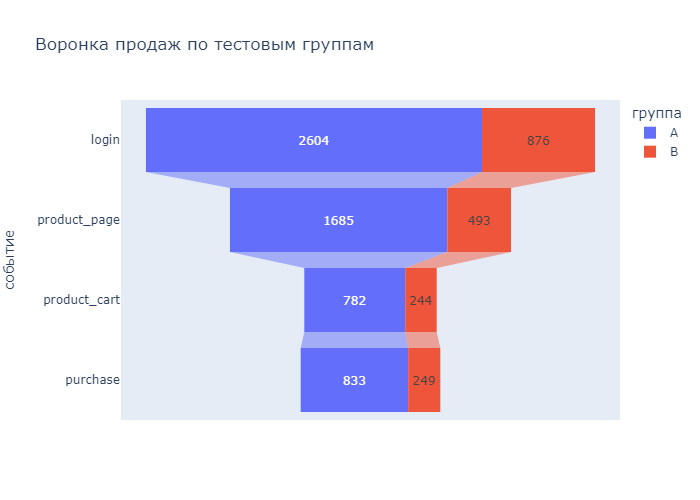

In [69]:
fig = px.funnel(funnel, title='Воронка продаж по тестовым группам', 
          labels={'event_name': 'событие', 'group': 'группа', 'value': 'число пользователей'})
fig.show('png')

Можно отметить, что покупок больше, чем просмотров корзин, значит просмотр корзин необязательный этапд для оформления заказа, т.е. доступна "быстрая покупка". По этой причине конверсию будем считать только относительно первого этапа (login), а не относительно предыдущего, иначе на последнем этапе конверсия будет больше 100%.

Посчитаем конверсию.

In [70]:
funnel = funnel.reset_index()

In [71]:
for group in ['A', 'B']:
    for i in range(len(funnel.index) - 1):
        if group == 'A':
            funnel.loc[0,'conv_A, %'] = 100
            funnel.loc[i+1,'conv_A, %'] = round(100*funnel.loc[i+1, group]/funnel.loc[0, group], 2)
        else:
            funnel.loc[0,'conv_B, %'] = 100
            funnel.loc[i+1, 'conv_B, %'] = round(100*funnel.loc[i+1, group]/funnel.loc[0, group], 2)    
        

In [72]:
funnel

group,event_name,A,B,"conv_A, %","conv_B, %"
0,login,2604,876,100.00,100.00
1,product_page,1685,493,64.71,56.28
2,product_cart,782,244,30.03,27.85
3,purchase,833,249,31.99,28.42


Конверсия по группе Б на каждом шаге ниже, чем конверсия по группе А, то есть экспериментальная группа показала ухудшение всех метрик по сравнению с контрольной группой. Ожидаемый результат по улучшению метрик от внедрения новой рекомендательной системы не достигнут.

Дополнительно попробуем определить другие характеристики участников обеих тестовых групп, чтобы понять насколько похоже/различается их поведение. Для этого посмотрим средний чек покупки по группам, а также распределение пользователей по устройствам.

In [73]:
#средняя сумма покупки по группам
avg_bill= recom_test[recom_test['details'].notnull()].groupby('group').agg(users=('user_id', 'nunique'),
                                                                 purchases=('user_id', 'count'),
                                                                 avg_purchase=('details', 'mean'))
avg_bill['avg_purchase'] = round(avg_bill['avg_purchase'], 1)
avg_bill

,users,purchases,avg_purchase
group,,,
A,833,2485,23.1
B,249,618,23.0


Средний чек по группам практически не отличается, т.е. участники каждой группы совершили примерно одинаковое количество заказов на пользователя. Покпуательское поведение групп схоже.

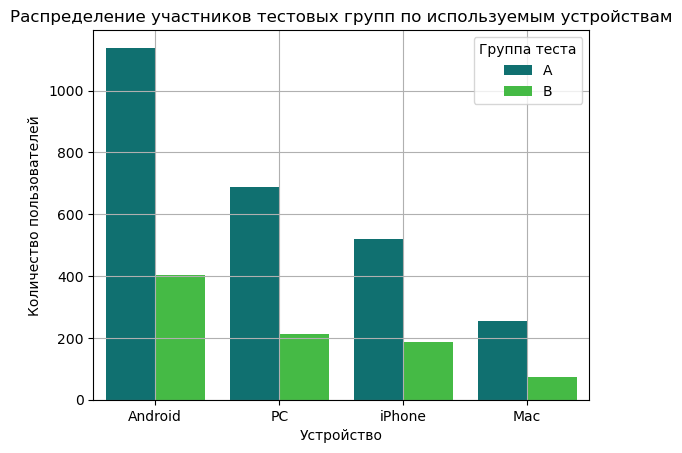

In [74]:
sns.barplot(data = (recom_test.groupby(['group', 'device'], as_index=False)
                    .agg({'user_id': 'nunique'})
                    .sort_values(by='user_id', ascending=False)),
            x='device', y='user_id', hue='group', palette=['teal', 'limegreen'])
plt.grid()
plt.legend(title='Группа теста')
plt.title('Распределение участников тестовых групп по используемым устройствам')
plt.ylabel('Количество пользователей')
plt.xlabel('Устройство');

Распределение участников групп по используемым устройствам также схоже: в каждой группе больше всего пользователей Android и меньше всего Mac.

### Особенности
Прежде чем приступать к А/Б тестированию необходимо учесть следующие особенности имеющихся данных:
- тест проводился одновременно с другим, конкурирующим А/Б тестом, при чем аудитории тестов имеют пересечения (с обеими группами конкурирующего теста);
- одновременно с проведением теста проходила маркетинговая акция, которая могла исказить результаты;
- тест проводился в предновогодний период, т.е. был подвержен сезонным изменениям поведения пользователей;
- требование ТЗ по количеству участников теста и соответственно по доле пользователей из Европы сначала соблюдалось, однако при более детальном анализе участников теста было обнаружено, что почти половина из них не могут быть учтены при оценке метрик, т.к. помимо регистрации не совершали других действий;
- количество участников теста неравномерно распределено между группами А и Б
- поведение участников обеих групп схоже по среднему чеку и используемым устройствам.


## Оцените результаты A/B-тестирования

Проверим равномерность распределения участников тестовых групп на каждом этапе воронки. Т.к. на одних и тех же данных будет проводится несколько сравнений (сравнение для каждого этапа воронки кроме первого), то это множественный тест, а значит нужно использовать поправку, например, Шидака, чтобы не терять мощность теста.

Для каждого этапа воронки будет проверяться следующий набор гипотез:
- H0: количество участников в каждой группе (доли) на каждом этапе воронки НЕ имею статистически значимой разницы;
- H1: доли имеют статистически значимую разницу.

In [75]:
nobs = np.array(funnel.loc[0, ['A', 'B']]) #всего залогинившихся пользователей в каждой из групп

In [76]:
alpha = .05
alpha_corr = 1 - (1 - alpha)**(1/(len(funnel.index) - 1)) #с поправкой Шидака

for i in range(1, len(funnel.index)):
    success = np.array(funnel.loc[i, ['A', 'B']])
    z_stat, p_value = proportions_ztest(success, nobs)
    print(success, nobs)
    print('Тест для этапа', funnel.loc[i, 'event_name'])
    print('p-значение: ', p_value)

    if p_value < alpha_corr:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')
    print('-------------------------------------------------------------------------------')

[1685 493] [2604 876]
Тест для этапа product_page
p-значение:  8.195976000351998e-06
Отвергаем нулевую гипотезу: между долями есть значимая разница
-------------------------------------------------------------------------------
[782 244] [2604 876]
Тест для этапа product_cart
p-значение:  0.2215941567364419
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
-------------------------------------------------------------------------------
[833 249] [2604 876]
Тест для этапа purchase
p-значение:  0.0486476669504243
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
-------------------------------------------------------------------------------


На этапе просмотра страницы товара количество участников в группах имеет статистически значимую разницу, а значит сделать вывод об изменении исследуемой метрики сделать нельзя.

На этапах просмотра корзины и совершения покупки количество учатсников в группах не имеют статистически значимых различий, при этом конверсия для контрольной группы на обоих этапах выше, чем для экспериментальной группы примерно на 3%. То есть вместо ожидаемого улучшения конверсии на 10% мы получили ухудшение на 3%. Получается, что внедрение улучшенной рекомендательной системы стоит отложить.

## Вывод
корректно ли проведен тест
какие нарушения (замечания) к проведению теста
что соответсвовало ТЗ, что нет, что в какой-то момент перестало соответствовать
рекомендации (стоит ли доверять резульаттам, получили хуже/лучше ожидаемого?)

На основе полученных результатов можно сделать вывод о том, что А/В тестирование было проведено **некорректно**, выявлены следующие нарушения:
- требование ТЗ по количеству участников теста и соответственно по доле пользователей из Европы сначала было удовлетворено, однако при более детальном анализе участников теста было обнаружено, что почти половина из них не могут быть учтены при оценке метрик, т.к. помимо регистрации не совершали других действий. Для корректного проведения теста необходимо, чтобы на этапе покупки (базовая конверсия 31,99% согласно результатам контрольной группы) было не менее 3361 участника (см. ниже);
- количество участников теста неравномерно распределено между группами А и В (в контрольной группе в 3 раза больше, чем в экспериментальной). Вероятно необходимо было выбрать другой период регистарции пользователей в тест - по регистрациям в группу А наблюдались большие скачки 14 и 21 декабря;
- период совершения различных событий участниками теста укладывается в даты проведения теста, однако последние действия были совершены 30 декабря, в то время как дата окончания теста - 4 января;
- некоторые участники теста совершали действия после 14-го дня с момента регистрации, что не соответствует требованиям ТЗ, такие пользователи не учитывались в анализе, что уменьшило мощность теста;
- одновременно с проведением теста проходила маркетинговая акция, которая могла повлиять на поведение пользователей и исказить результаты;
- тест проводился в предновогодний период, т.е. был подвержен сезонным изменениям поведения пользователей;
- тест проводился одновременно с другим, конкурирующим А/Б тестом, при чем аудитории тестов имеют пересечения - 25% пользователей рассматриваемого теста также стали участниками другого теста (обеих группами). Таким образом участники конкурирующего теста могли оказать влияние на исследуемый тест и исказить его результаты. Было принято решение учесть в анализе пользователей, попавших в экспериментальную группу другого теста, т.к. они равномерно распределены между группами нашего теста, а значит оказывают одинаковое влияние;

Воронка продаж имеет следующую структуру (после регистрации пользователя): логин, просмотр страницы товара, просмотр корзины (перемещение товара в корзину), покупка. Для каждого из этапов наиболее количество совершенных действий приходится на первые сутки после регистрации. Далее количество событий постепенно уменьшается. При этом совершить покупку можно минуя этап с просмотром корзины, поэтому конверсия на каждом из этапов расчитывалась относительно действия login.

По результатам теста внедрение улучшенной рекомендательной системы не показало ожидаемых результатов, а наоборот ухудшило имеющиеся показатели. Однако, т.к. тест был проведен с нарушениями доверять полученным результатам нельзя. Рекмоендуется провести тест повторно, выбрав более удачный период времени (без параллельных тестов и без сезонных характерных изменений) с учетом всех требований ТЗ.


Рекомендуемое количество участников теста, совершивших покупку:

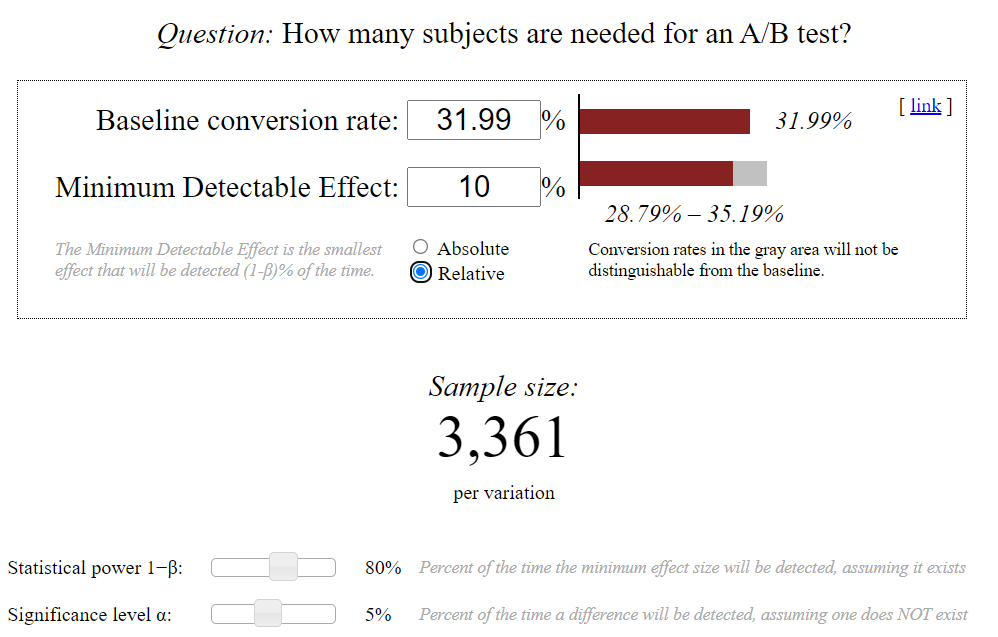